# 神經網路實做

## 拿取加權指數資料

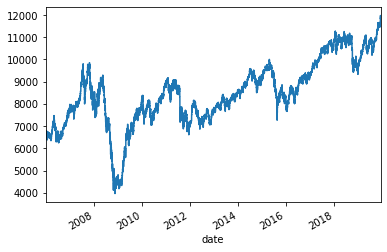

In [2]:
from finlab.data import Data
%matplotlib inline

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]
twii.plot()

## 製作features

In [4]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

## 刪除NaN

In [5]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (65512, 43)
after dropping NaN (63584, 43)


## 神經網路Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,...,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,63584.000000
mean,9.287152e-16,2.362157e-16,-2.546948e-15,-5.324754e-16,-2.779168e-15,-5.711181e-15,3.174011e-17,1.624415e-17,-5.556004e-18,-9.500077e-17,...,-3.178879e-15,-4.211528e-18,-7.738595e-17,3.774643e-16,-3.569436e-16,1.550792e-16,9.551787e-16,-4.445502e-16,9.948670e-16,1.000124
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008154
min,-4.479986e+00,-4.476390e+00,-4.462974e+00,-4.430238e+00,-4.403764e+00,-4.354093e+00,-6.674815e+00,-2.583431e+00,-2.664782e+00,-2.622981e+00,...,-5.602122e+00,-7.182554e+00,-6.205743e+00,-2.149364e+00,-1.965232e+00,-1.732799e+00,-1.664698e+00,-1.810270e+00,-1.943732e+00,0.924507
25%,-7.011410e-01,-6.988210e-01,-6.847633e-01,-6.754789e-01,-6.736461e-01,-6.619580e-01,-5.160796e-01,-6.382678e-01,-6.511064e-01,-6.292454e-01,...,-5.231101e-01,-5.081351e-01,-5.233689e-01,-7.435696e-01,-6.966624e-01,-7.352871e-01,-6.825656e-01,-6.743821e-01,-6.881520e-01,0.997045
50%,8.774320e-02,1.165936e-01,1.207810e-01,1.336859e-01,1.406750e-01,1.511560e-01,1.060696e-01,-1.161657e-02,-2.851093e-02,-9.946391e-05,...,1.226479e-01,8.667013e-02,9.332349e-02,-1.479041e-01,-2.320956e-01,-2.531125e-01,-2.184475e-01,-1.835524e-01,-1.922920e-01,1.000245
75%,7.360578e-01,7.248943e-01,7.035485e-01,7.119529e-01,7.172281e-01,7.148658e-01,6.352101e-01,6.503231e-01,6.691416e-01,6.039788e-01,...,5.609358e-01,6.045263e-01,6.297954e-01,6.161606e-01,4.658794e-01,4.615743e-01,4.392283e-01,4.145666e-01,5.538532e-01,1.003615
max,2.939533e+00,2.912320e+00,3.002593e+00,3.013101e+00,3.005172e+00,2.986194e+00,4.418175e+00,2.723035e+00,2.573121e+00,2.517116e+00,...,4.983123e+00,5.735046e+00,4.812886e+00,4.608142e+00,3.713968e+00,4.170525e+00,3.756551e+00,3.813702e+00,3.824424e+00,1.087726


In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,...,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,6.358400e+04,63584.000000
mean,9.287152e-16,2.362157e-16,-2.546948e-15,-5.324754e-16,-2.779168e-15,-5.711181e-15,3.174011e-17,1.624415e-17,-5.556004e-18,-9.500077e-17,...,-3.178879e-15,-4.211528e-18,-7.738595e-17,3.774643e-16,-3.569436e-16,1.550792e-16,9.551787e-16,-4.445502e-16,9.948670e-16,1.000124
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008154
min,-4.479986e+00,-4.476390e+00,-4.462974e+00,-4.430238e+00,-4.403764e+00,-4.354093e+00,-6.674815e+00,-2.583431e+00,-2.664782e+00,-2.622981e+00,...,-5.602122e+00,-7.182554e+00,-6.205743e+00,-2.149364e+00,-1.965232e+00,-1.732799e+00,-1.664698e+00,-1.810270e+00,-1.943732e+00,0.924507
25%,-7.011410e-01,-6.988210e-01,-6.847633e-01,-6.754789e-01,-6.736461e-01,-6.619580e-01,-5.160796e-01,-6.382678e-01,-6.511064e-01,-6.292454e-01,...,-5.231101e-01,-5.081351e-01,-5.233689e-01,-7.435696e-01,-6.966624e-01,-7.352871e-01,-6.825656e-01,-6.743821e-01,-6.881520e-01,0.997045
50%,8.774320e-02,1.165936e-01,1.207810e-01,1.336859e-01,1.406750e-01,1.511560e-01,1.060696e-01,-1.161657e-02,-2.851093e-02,-9.946391e-05,...,1.226479e-01,8.667013e-02,9.332349e-02,-1.479041e-01,-2.320956e-01,-2.531125e-01,-2.184475e-01,-1.835524e-01,-1.922920e-01,1.000245
75%,7.360578e-01,7.248943e-01,7.035485e-01,7.119529e-01,7.172281e-01,7.148658e-01,6.352101e-01,6.503231e-01,6.691416e-01,6.039788e-01,...,5.609358e-01,6.045263e-01,6.297954e-01,6.161606e-01,4.658794e-01,4.615743e-01,4.392283e-01,4.145666e-01,5.538532e-01,1.003615
max,2.939533e+00,2.912320e+00,3.002593e+00,3.013101e+00,3.005172e+00,2.986194e+00,4.418175e+00,2.723035e+00,2.573121e+00,2.517116e+00,...,4.983123e+00,5.735046e+00,4.812886e+00,4.608142e+00,3.713968e+00,4.170525e+00,3.756551e+00,3.813702e+00,3.824424e+00,1.087726


## 神經網路 Model

In [9]:
import keras.layers as layers
from keras.models import Sequential
import keras

model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________


## 神經網路訓練

In [10]:
dataset_scaled_train = dataset_scaled[:'2015']


model.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1)




Epoch 1/1





45221/45221 [==============================] - 4s 97us/step - loss: 0.6911


## 回測

In [11]:
ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)

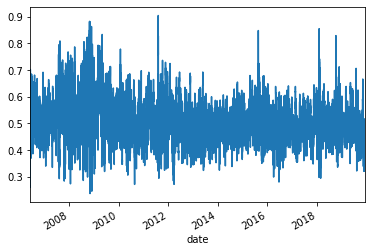

In [12]:
ey.plot()

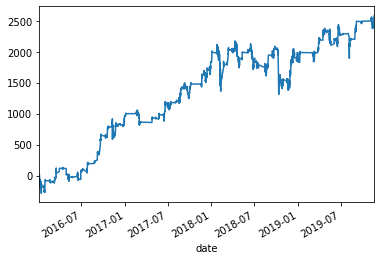

In [13]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2016':]).cumsum()
eq.plot()

In [14]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

822.0